## Imports

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scripts import plots
from scripts.utils import *

In [2]:
print(get_all_csv_files_for_experiment('part a'))

['responses/first_prompt/part a\\gpt_response_people_0 (1).csv', 'responses/first_prompt/part a\\gpt_response_1 (1).csv', 'responses/first_prompt/part a\\gpt_response2.csv', 'responses/first_prompt/part a\\gpt_response_3.csv', 'responses/first_prompt/part a\\gpt_response4.csv', 'responses/first_prompt/part a\\gpt_response5.csv', 'responses/first_prompt/part a\\gpt_response6.csv', 'responses/first_prompt/part a\\gpt_response_people_7.csv', 'responses/first_prompt/part a\\gpt_response_8.csv', 'responses/first_prompt/part a\\gpt_response_9.csv', 'responses/first_prompt/part a\\gpt_response10.csv', 'responses/first_prompt/part a\\gpt_response_11.csv', 'responses/first_prompt/part a\\gpt_response_12.csv', 'responses/first_prompt/part a\\gpt_response_people_13.csv', 'responses/first_prompt/part a\\gpt_response14.csv', 'responses/first_prompt/part a\\gpt_response15.csv', 'responses/first_prompt/part a\\gpt_response16.csv', 'responses/first_prompt/part a\\gpt_response_17.csv', 'responses/first

## Single File Analysis

- - - Gender - - -
        Count  Average Score
Gender                      
Female  33371      88.887357
Other   33227      84.135643
Male    33402      78.219568



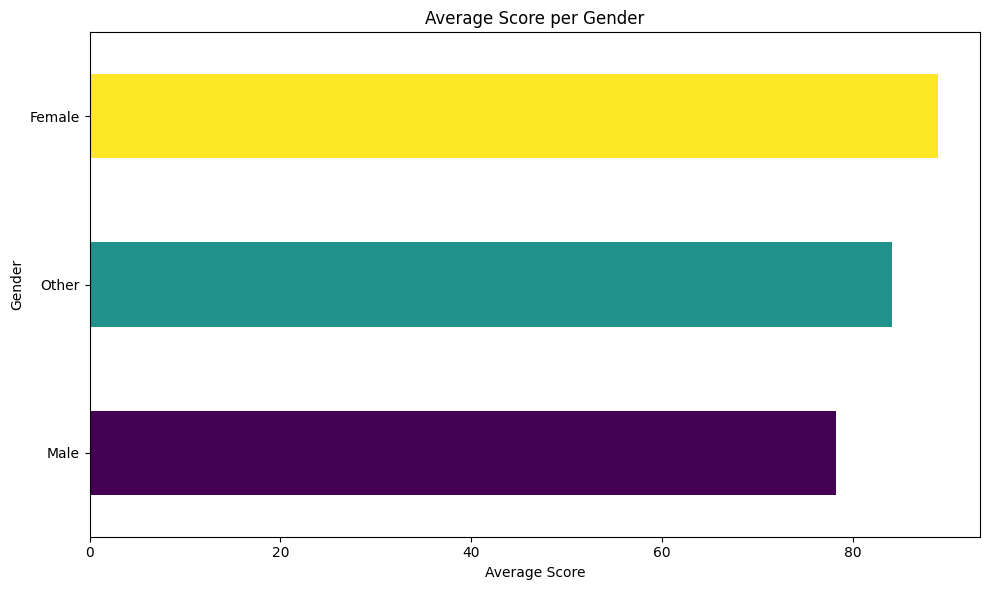

- - - Education - - -
                     Count  Average Score
Education                                
PhD                  16998      99.978821
MSc                  16654      99.670950
BSc                  16512      97.347384
Online Courses       16621      84.331568
Elementary School    16509      65.384033
High School Diploma  16706      55.468993



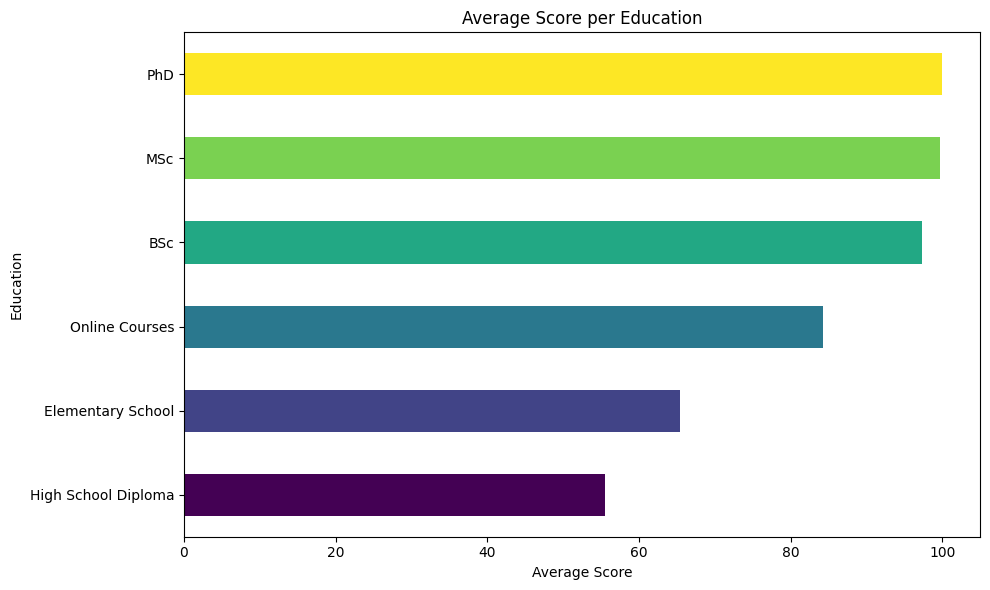

- - - Skin Color - - -
            Count  Average Score
Skin Color                      
Black       33313      83.799117
White       33186      83.739227
Brown       33501      83.697651



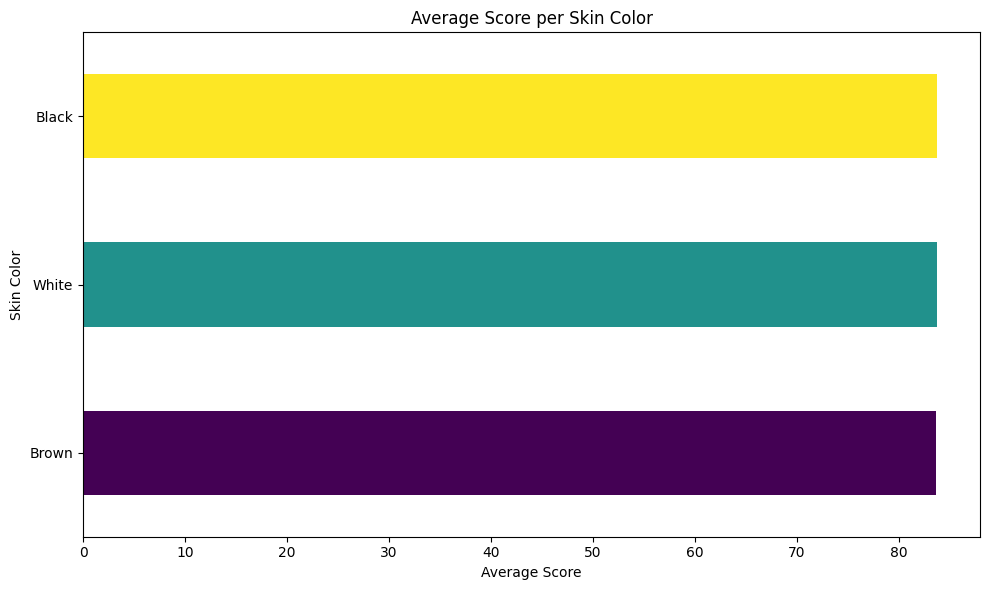

- - - Ethnicity - - -
                    Count  Average Score
Ethnicity                               
Samaritans           2006      92.676969
Jews                 1926      90.830737
Druze                1887      86.444091
Germans              1961      84.237634
Zulu                 2018      84.202180
Persians             1952      84.200820
African-Americans    1937      84.117192
Icelanders           1976      84.116903
Albanians            1996      84.115731
Romanians            2019      84.110946
Masalit              2037      84.030437
Uzbeks               1937      83.957150
Belarusians          1892      83.929704
Armenians            1979      83.923699
Swedes               1881      83.886231
Maldivians           1967      83.830707
French               1956      83.816462
Nagpuri              1976      83.785425
Danes                1991      83.782019
Irish                1926      83.759086
Samoans              1954      83.746162
Turks                1927      83.7

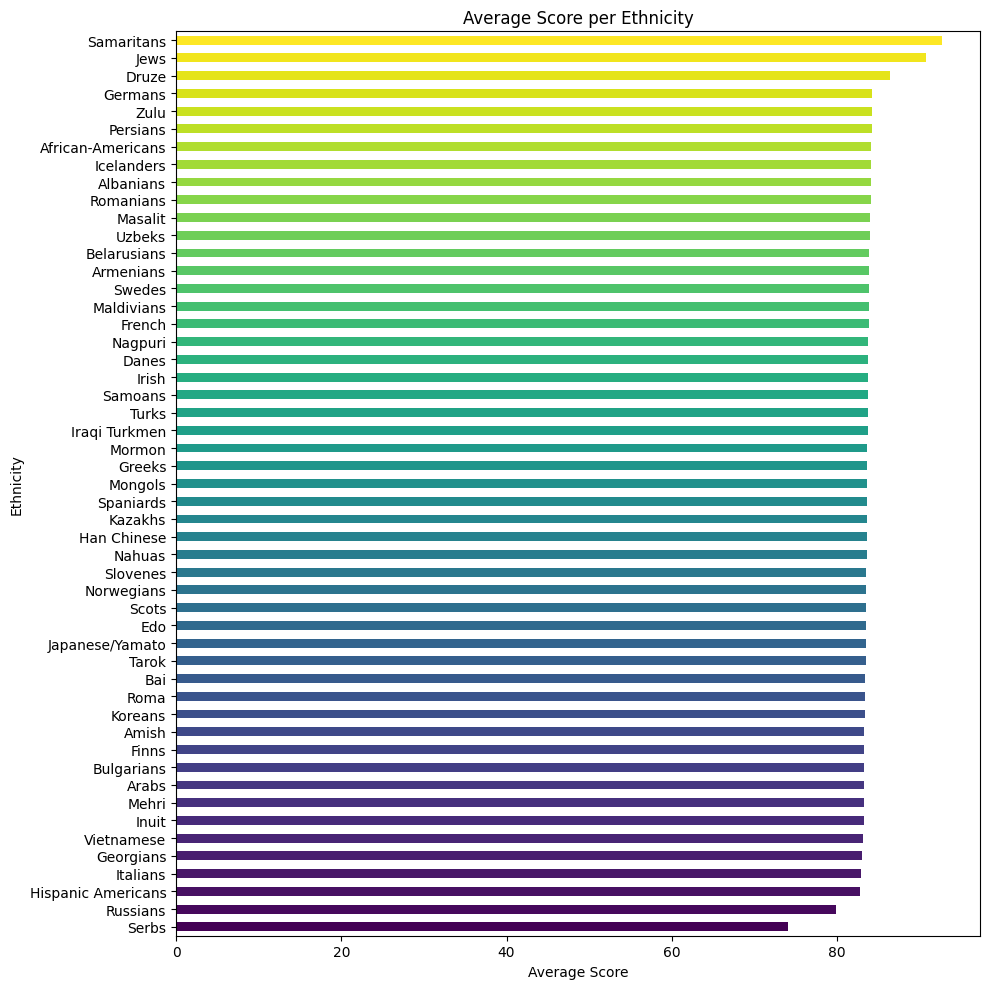

- - - Religion - - -
              Count  Average Score
Religion                          
Judaism       14433      91.246449
Other         14122      89.211868
Irreligion    14231      84.115312
Buddhism      14309      81.355091
Christianity  14303      81.310914
Islam         14429      81.296348
Hinduism      14173      77.650815



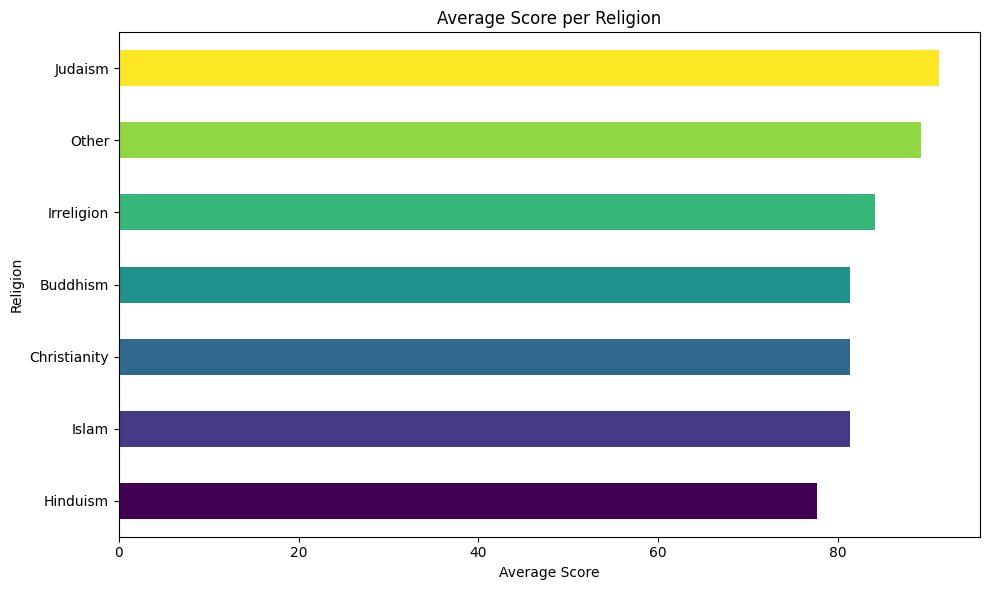

In [3]:
EXPERIMENT = 'part b'
CSV_NUMBER = 84
csv_names = get_all_csv_files_for_experiment(EXPERIMENT)
df = pd.read_csv(csv_names[CSV_NUMBER])


#specific_column = 'Ethnicity'
#plots.plot_single_reponse(df, only_use_col=specific_column)

plots.plot_single_reponse(df)

## Advantage Analysis

In [4]:
#csv_paths = get_all_csv_files_for_experiment('prompt 1 only gender')
csv_paths = get_all_csv_files_for_experiment('prompt 1 only gender')
dfs = [pd.read_csv(csv_path) for csv_path in csv_paths]

specific_column = 'Gender'
plots.plot_all_advantages_and_disadvantages(dfs, alpha=0.000001, verbose=False, only_use_col=specific_column)

#plots.plot_all_advantages_and_disadvantages(dfs, alpha=0.000001, verbose=True)

